# Versuch 1: Kalibrierung und Einsatz eines Infrarot-Entfernungsmessers
Dominik Bartsch, Stefan Ptacek, Niklas Kaiser

In [57]:
!python -m pip install numpy scipy matplotlib

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as m

## Aufgabe 1: Ermittlung der Kennlinie des Abstandssensors

In [59]:
data = 0
vec = np.zeros((21, 3))

# Abstandswerte in cm
distance = np.array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70])
# Volt werte
volt = np.array([1.343, 1.2102, 1.050 , 0.974, 0.855, 0.790, 0.760, 0.698, 0.642, 0.603, 0.581, 0.563, 0.543, 0.466, 0.464, 0.447, 0.444, 0.447, 0.390, 0.380, 0.322])

[[1.00000000e+01 1.36778389e+00 2.22251743e-02]
 [1.30000000e+01 1.18078534e+00 2.25797209e-02]
 [1.60000000e+01 1.06928570e+00 2.01494387e-02]
 [1.90000000e+01 9.84961363e-01 1.88573724e-02]
 [2.20000000e+01 9.28133987e-01 1.95241487e-02]
 [2.50000000e+01 8.12611424e-01 2.37157183e-02]
 [2.80000000e+01 7.11166568e-01 2.14549814e-02]
 [3.10000000e+01 6.54343895e-01 1.76792292e-02]
 [3.40000000e+01 6.53330396e-01 1.81068693e-02]
 [3.70000000e+01 5.76829159e-01 2.31977447e-02]
 [4.00000000e+01 5.19287264e-01 1.96922110e-02]
 [4.30000000e+01 5.00869367e-01 2.23759563e-02]
 [4.60000000e+01 5.60748480e-01 1.87423681e-02]
 [4.90000000e+01 4.81649172e-01 2.28291789e-02]
 [5.20000000e+01 5.04674752e-01 2.11613388e-02]
 [5.50000000e+01 4.44085836e-01 2.41864832e-02]
 [5.80000000e+01 4.02558463e-01 2.37788875e-02]
 [6.10000000e+01 3.78419108e-01 1.93841252e-02]
 [6.40000000e+01 3.61526861e-01 2.20652260e-02]
 [6.70000000e+01 3.42110226e-01 2.30900336e-02]
 [7.00000000e+01 3.76187580e-01 2.339999

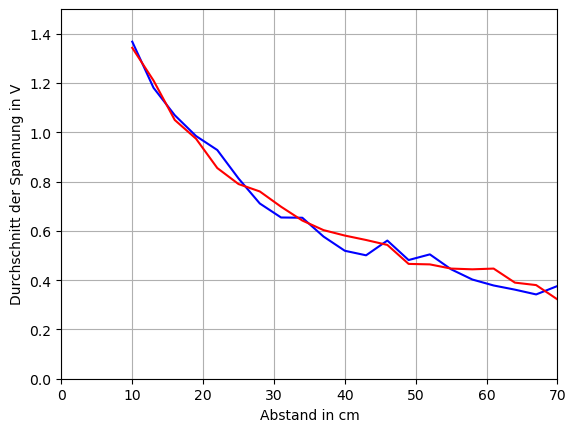

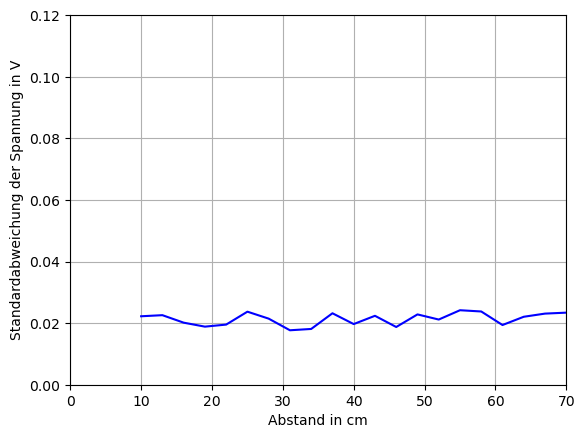

In [60]:
# For Schleife um die einzelnen Dateien einzulesen
for idx, x in enumerate(distance):
    # data sind die Werte aus den .csv Dateien. Mit rang[ten] werden die einzelnen Abstandswerte aus rang abgerufen
    
    #x.replace(',' '.').encode()
    data = np.genfromtxt('messungA1/' + str(distance[idx]) + 'cm.csv', delimiter=";", skip_header=1000, skip_footer=500,
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

    # Stelle 0: Abstand in cm
    vec[idx, 0] = distance[idx]
    # Stelle 1: Durchschnitt der Spannung für einen bestimmten Abstand in cm
    vec[idx, 1] = np.mean(data)
    # Stelle 2: Standartabweichung der Spannung für einen bestimmten Abstand in cm
    vec[idx, 2] = np.std(data)

print(vec)

# Zeichnung des Graphen für den Durchschnitt der Spannung
plt.plot(distance, vec[:,1], 'b')
plt.plot(distance, volt, 'r')
plt.ylabel('Durchschnitt der Spannung in V')
plt.xlabel('Abstand in cm')
plt.axis([0, 70, 0, 1.5])
plt.grid(True)
plt.show()

# Zeichnung des Graphen für die Standartabweichung der Spannung
plt.plot(distance, vec[:,2], 'b')
plt.ylabel('Standardabweichung der Spannung in V')
plt.xlabel('Abstand in cm')
plt.axis([0, 70, 0, 0.12])
plt.grid(True)
plt.show()

## Aufgabe 2: Modellierung der Kennlinie durch lineare Regression

In [61]:
# leere Matrix für Messwerte
measurements = np.zeros((distance.size, 3))

# Daten aus Dateien auslesen
for idx, x in enumerate(distance):
    data = np.genfromtxt('messungA1/' + str(distance[idx]) + 'cm.csv', delimiter=";", skip_header=1000, skip_footer=500,
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

    # Stelle 0: Logarithmus des Abstandes in cm
    measurements[idx, 0] = np.log(int(distance[idx]))
    # Stelle 1: Logarithmus des Durchschnittes der Spannung in Volt
    measurements[idx, 1] = np.log(np.mean(data))
    #Stelle 2:
    measurements[idx, 2] = np.mean(data)

print(measurements)

[[ 2.30258509  0.31319183  1.36778389]
 [ 2.56494936  0.16617976  1.18078534]
 [ 2.77258872  0.06699085  1.0692857 ]
 [ 2.94443898 -0.01515286  0.98496136]
 [ 3.09104245 -0.07457917  0.92813399]
 [ 3.21887582 -0.20750224  0.81261142]
 [ 3.33220451 -0.3408486   0.71116657]
 [ 3.4339872  -0.42412223  0.6543439 ]
 [ 3.52636052 -0.42567231  0.6533304 ]
 [ 3.61091791 -0.55020914  0.57682916]
 [ 3.68887945 -0.65529805  0.51928726]
 [ 3.76120012 -0.69140996  0.50086937]
 [ 3.8286414  -0.57848282  0.56074848]
 [ 3.8918203  -0.73053929  0.48164917]
 [ 3.95124372 -0.68384111  0.50467475]
 [ 4.00733319 -0.81173741  0.44408584]
 [ 4.06044301 -0.90991494  0.40255846]
 [ 4.11087386 -0.97175295  0.37841911]
 [ 4.15888308 -1.01741894  0.36152686]
 [ 4.20469262 -1.0726223   0.34211023]
 [ 4.24849524 -0.97766738  0.37618758]]


-0.6850457911273584
1.9327464084376949


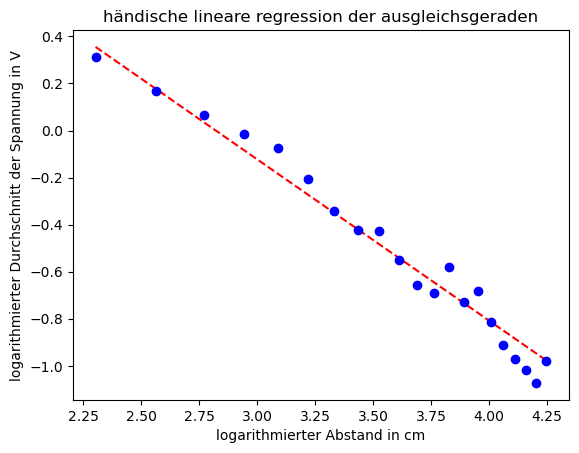

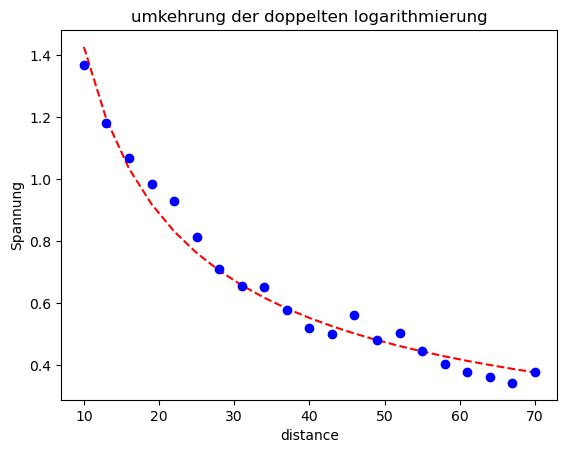

1. Logarithmierung der Eingangs- und Ausganswerte:


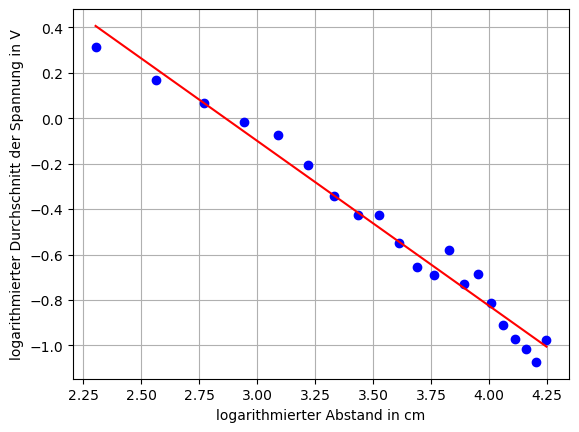

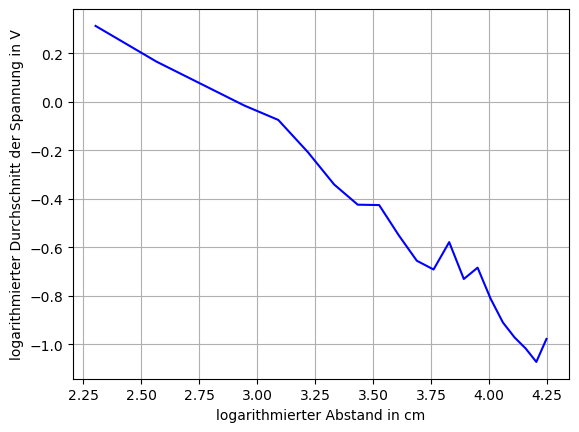

In [62]:
# Werte für lineare Regression
x = np.array(measurements[:,0])
y = np.array(measurements[:,1])

imean = np.mean(measurements[:,0])
omean = np.mean(measurements[:,1])
upper = 0
lower = 0

for i in measurements:
    upper = (i[0]-imean)*(i[1]-omean)
    lower = np.square(i[0]-imean)

a = upper/lower

b = omean - a * imean
print('a='a)
print('b='b)

space = np.linspace(np.min(measurements[:,0]), np.max(measurements[:,0]), 20)

plt.plot(space, a*space+b, "r--")
plt.plot(measurements[:,0], measurements[:,1], "bo")
plt.xlabel('logarithmierter Abstand in cm')
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.title('händische lineare regression der ausgleichsgeraden')
plt.show()

lingreg = np.exp(b)*distance**a

plt.plot(distance, lingreg, "r--")
plt.plot(distance, measurements[:,2], 'bo')
plt.xlabel('distance')
plt.ylabel('Spannung')
plt.title('umkehrung der doppelten logarithmierung')
plt.show()

print("1. Logarithmierung der Eingangs- und Ausganswerte:")
# lineare Regression durchführen
gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
mn = np.min(x)
mx = np.max(x)
x1 = np.linspace(mn, mx, 500)
y1 = gradient * x1 + intercept

# Darstellung der Linearen Regression in einem Graphen
plt.plot(x, y, 'ob')
plt.plot(x1, y1, '-r')
plt.grid(True)
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.xlabel('logarithmierter Abstand in cm')
plt.show()

# Darstellung der Kennlinie in einem Graphen
plt.plot(x, y, 'b')
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.xlabel('logarithmierter Abstand in cm')
plt.grid(True)
plt.show()



### Aufgabe 3

In [85]:
data = 0
data2 = 0
faktor2 = 1.96

# data sind die Werte aus der (21cm) breiten DinA4 Seite in die .csv Datei gespeichert wurden.
kurz = np.genfromtxt('messungA3/dinA4-kurz.csv', delimiter=";", skip_header=1000, skip_footer=500,
                     usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

# data2 sind die Werte aus der (29,7cm) langen DinA4 Seite in die .csv Datei gespeichert wurden.
lang = np.genfromtxt('messungA3/dinA4-lang.csv', delimiter=";", skip_header=1000, skip_footer=500,
                      usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

ableitung_lang = (np.exp(b) * a * np.mean(lang) ** (a - 1))
ableitung_kurz = (np.exp(b) * a * np.mean(kurz) ** (a - 1))

fehler_kurz_68 = ableitung_kurz * np.std(kurz) * 1
fehler_kurz_95 = ableitung_kurz * np.std(kurz) * 1.96

print('fehler kurz 95%: +-' + str(fehler_kurz_95.round(3) * (-1)) + 'cm')
print('fehler kurz 68%: +-' + str(fehler_kurz_68.round(3) * (-1)) + 'cm')

fehler_lang_68 = ableitung_lang * np.std(lang) * 1
fehler_lang_95 = ableitung_lang * np.std(lang) * 1.96

print('fehler lang 95%: +-' + str(fehler_lang_95.round(3) * (-1)) + 'cm')
print('fehler lang 68%: +-' + str(fehler_lang_68.round(3) * (-1)) + 'cm')

x_kurz = (np.mean(kurz) / m.exp(b)) ** (1 / a)
x_lang = (np.mean(lang) / m.exp(b)) ** (1 / a)
flaeche = x_kurz * x_lang
print('strecke kurz: ' + str(x_kurz) + ' strecke lang: ' + str(x_lang) + ', flaeche = ' + str(flaeche) + 'cm^2')



fehler_fortpflanzung_68 = np.sqrt(((strecke_lang * np.std(kurz) * 1)**2) + ((strecke_kurz * np.std(lang) * 1)**2))
fehler_fortpflanzung_95 = np.sqrt(((strecke_lang * np.std(kurz) * 1.96)**2) + ((strecke_kurz * np.std(lang) * 1.96)**2))

print('Fehlerfortpflanzung 68%: +-' + str(fehler_fortpflanzung_68.round(3)))
print('Fehlerfortpflanzung 95%: +-' + str(fehler_fortpflanzung_95.round(3)))




fehler kurz 95%: +-0.263cm
fehler kurz 68%: +-0.134cm
fehler lang 95%: +-0.35cm
fehler lang 68%: +-0.179cm
strecke kurz: 19.313644318322577 strecke lang: 27.705657500490332, flaeche = 535.0972145697364cm^2
Fehlerfortpflanzung 68%: +-0.26257654665886637
Fehlerfortpflanzung 95%: +-0.5146500314513781
